In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV

# Questão 8

# a)

In [10]:
# Create a predictor X
X = np.random.default_rng().normal(size=100)
# Create a Noise Vector e
e = np.random.default_rng().normal(size=100)

# b)

In [11]:
B_0 = 0.5
B_1 = -0.3
B_2 = 3
B_3 = 0.7

Y = B_0 + B_1 * X + B_2 * (X ** 2) + B_3 * (X ** 3) + e

# c)

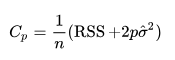

In [4]:
def forward_stepwise(X, Y):
    features = np.array([X**i for i in range(1, 11)]).T

    best_rss_set = []
    best_features_idx = []
    best_cp = np.inf
    best_model_features = []
    # rever
    full_model = LinearRegression().fit(features, Y)
    sigma_hat_squared = mean_squared_error(Y, full_model.predict(features))

    features_idx = [i for i in range(features.shape[1])]

    while features_idx:
        best_rss = None
        best_idx = None
        for feature_idx in features_idx:
            features_set = features[:, best_features_idx + [feature_idx]]
            model = LinearRegression().fit(features_set,Y)
            y_pred = model.predict(features_set)
            Rss = np.sum((Y - y_pred)**2)

            if best_rss is None or Rss < best_rss:
                best_rss = Rss
                best_idx = feature_idx

        best_rss_set.append(best_rss)
        best_features_idx.append(best_idx)
        features_idx.remove(best_idx)

        p = len(best_features_idx) + 1

        n = 100

        # rever como é o cálculo do c_p statistics que o livro pede
        c_p = (best_rss + 2 * p * sigma_hat_squared) / n

        if c_p < best_cp:
            best_cp = c_p
            best_model_features = list(best_features_idx)
            final_model = LinearRegression().fit(features[:, best_features_idx], Y)
            coefficients = final_model.coef_

        print(f'O c_p statistics de {best_features_idx} é {c_p}')

    print(f'\nO modelo selecionado de acordo com o c_p statistics é:{best_model_features}, e os coeficientes são: {coefficients}')

forward_stepwise(X, Y)

O c_p statistics de [1] é 3.0493241855124675
O c_p statistics de [1, 2] é 0.9662430635314441
O c_p statistics de [1, 2, 0] é 0.9517398613734414
O c_p statistics de [1, 2, 0, 8] é 0.9452678086671286
O c_p statistics de [1, 2, 0, 8, 3] é 0.9540425815567989
O c_p statistics de [1, 2, 0, 8, 3, 5] é 0.9561710939132503
O c_p statistics de [1, 2, 0, 8, 3, 5, 9] é 0.9693568109884707
O c_p statistics de [1, 2, 0, 8, 3, 5, 9, 4] é 0.9836923890167291
O c_p statistics de [1, 2, 0, 8, 3, 5, 9, 4, 6] é 0.990027626538114
O c_p statistics de [1, 2, 0, 8, 3, 5, 9, 4, 6, 7] é 1.0041789258149487

O modelo selecionado de acordo com o c_p statistics é:[1, 2, 0, 8], e os coeficientes são: [ 3.02357520e+00  8.39674217e-01 -5.37545970e-01 -8.25521463e-04]


# d)

In [6]:
def backward_stepwise(X, Y):
    features = np.array([X**i for i in range(1, 11)]).T

    full_features_idx = [i for i in range(features.shape[1])]

    full_model = LinearRegression().fit(features, Y)
    sigma_hat_squared = mean_squared_error(Y, full_model.predict(features))

    best_features_idx = []
    best_rss_set = []
    best_cp = np.inf

    while len(full_features_idx) > 1:
        best_rss = None
        best_idx = None
        for feature_idx in full_features_idx:
            x = full_features_idx.copy()
            x.remove(feature_idx)
            features_set = features[:, x]
            model = LinearRegression().fit(features_set, Y)
            y_pred = model.predict(features_set)
            Rss = np.sum((Y - y_pred)**2)

            if best_rss is None or Rss < best_rss:
                best_rss = Rss
                best_idx = feature_idx 
        
        full_features_idx.remove(best_idx)
        best_rss_set.append(best_rss)
        best_features_idx.append(best_idx)

        p = len(full_features_idx)

        n = 100

        # rever como é o cálculo do c_p statistics que o livro pede
        c_p = (best_rss + 2 * p * sigma_hat_squared) / n

        if c_p < best_cp:
            # melhor c_p
            best_cp = c_p
            # lista de features com menor RSS
            best_model_features = list(full_features_idx)
            # Modelo final feito com a lista de features com menor RSS
            final_model = LinearRegression().fit(features[:, best_model_features], Y)
            # Coeficientes desse modelo
            coefficients = final_model.coef_

        print(f'O c_p statistics de {full_features_idx} é {c_p}')

    print(f'\nO modelo selecionado de acordo com o c_p statistics é:{best_model_features}, e os coeficientes são: {coefficients}')

backward_stepwise(X, Y)

"""
As resposta são iguais :O

O c_p statistics de [0, 1, 2, 4, 5, 6, 7, 8, 9] é 0.9715629683429952
O c_p statistics de [1, 2, 4, 5, 6, 7, 8, 9] é 0.9554900220754975
O c_p statistics de [1, 2, 4, 5, 6, 7, 8] é 0.9513374121533709
O c_p statistics de [1, 2, 4, 5, 6, 7] é 0.9444847824671899
O c_p statistics de [1, 4, 5, 6, 7] é 0.9291708322968462
O c_p statistics de [1, 4, 5, 6] é 0.9240320446350035
O c_p statistics de [1, 4, 6] é 0.9165553192844409
O c_p statistics de [1, 4] é 1.159652350712543
O c_p statistics de [1] é 3.032862235908944

O modelo selecionado de acordo com o c_p statistics é:[1, 4, 6], e os coeficientes são: [ 3.06697234  0.33486569 -0.04002484]
